# Neural Network to Predict College Admission Using Tensorflow


In [1]:
# import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# read csv
admission_df = pd.read_csv('Admission_Predict.csv')
admission_df.drop('Serial No.', axis = 1, inplace = True)

In [3]:
# check for null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
# Group by university ranking
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### Visualize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DAB8FAABC8>,
      dtype=object)

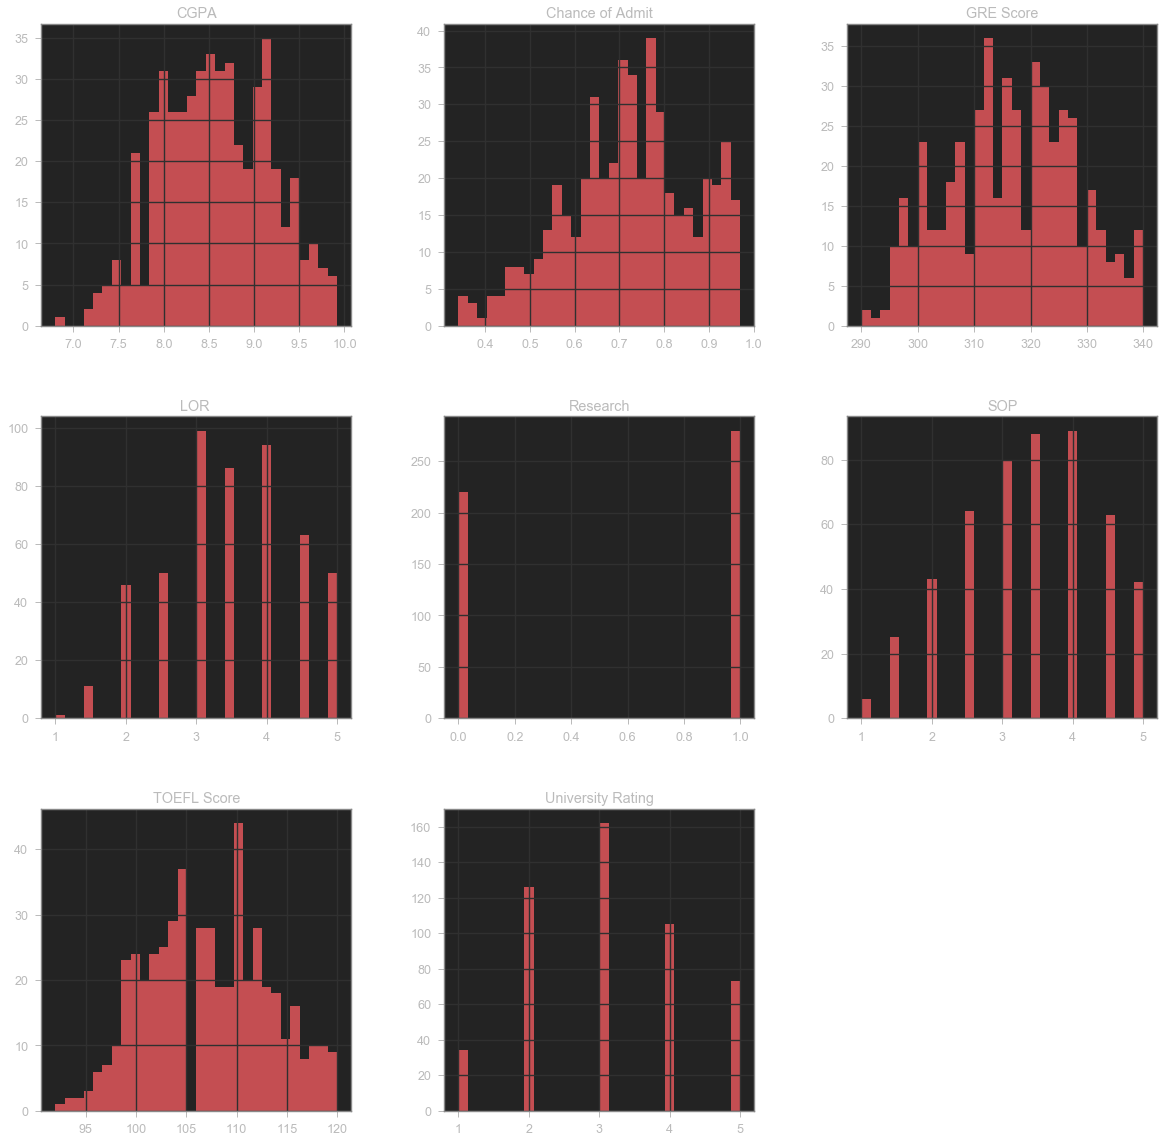

In [5]:
# view histograms
admission_df.hist(bins = 30, figsize = (20, 20), color = 'r')

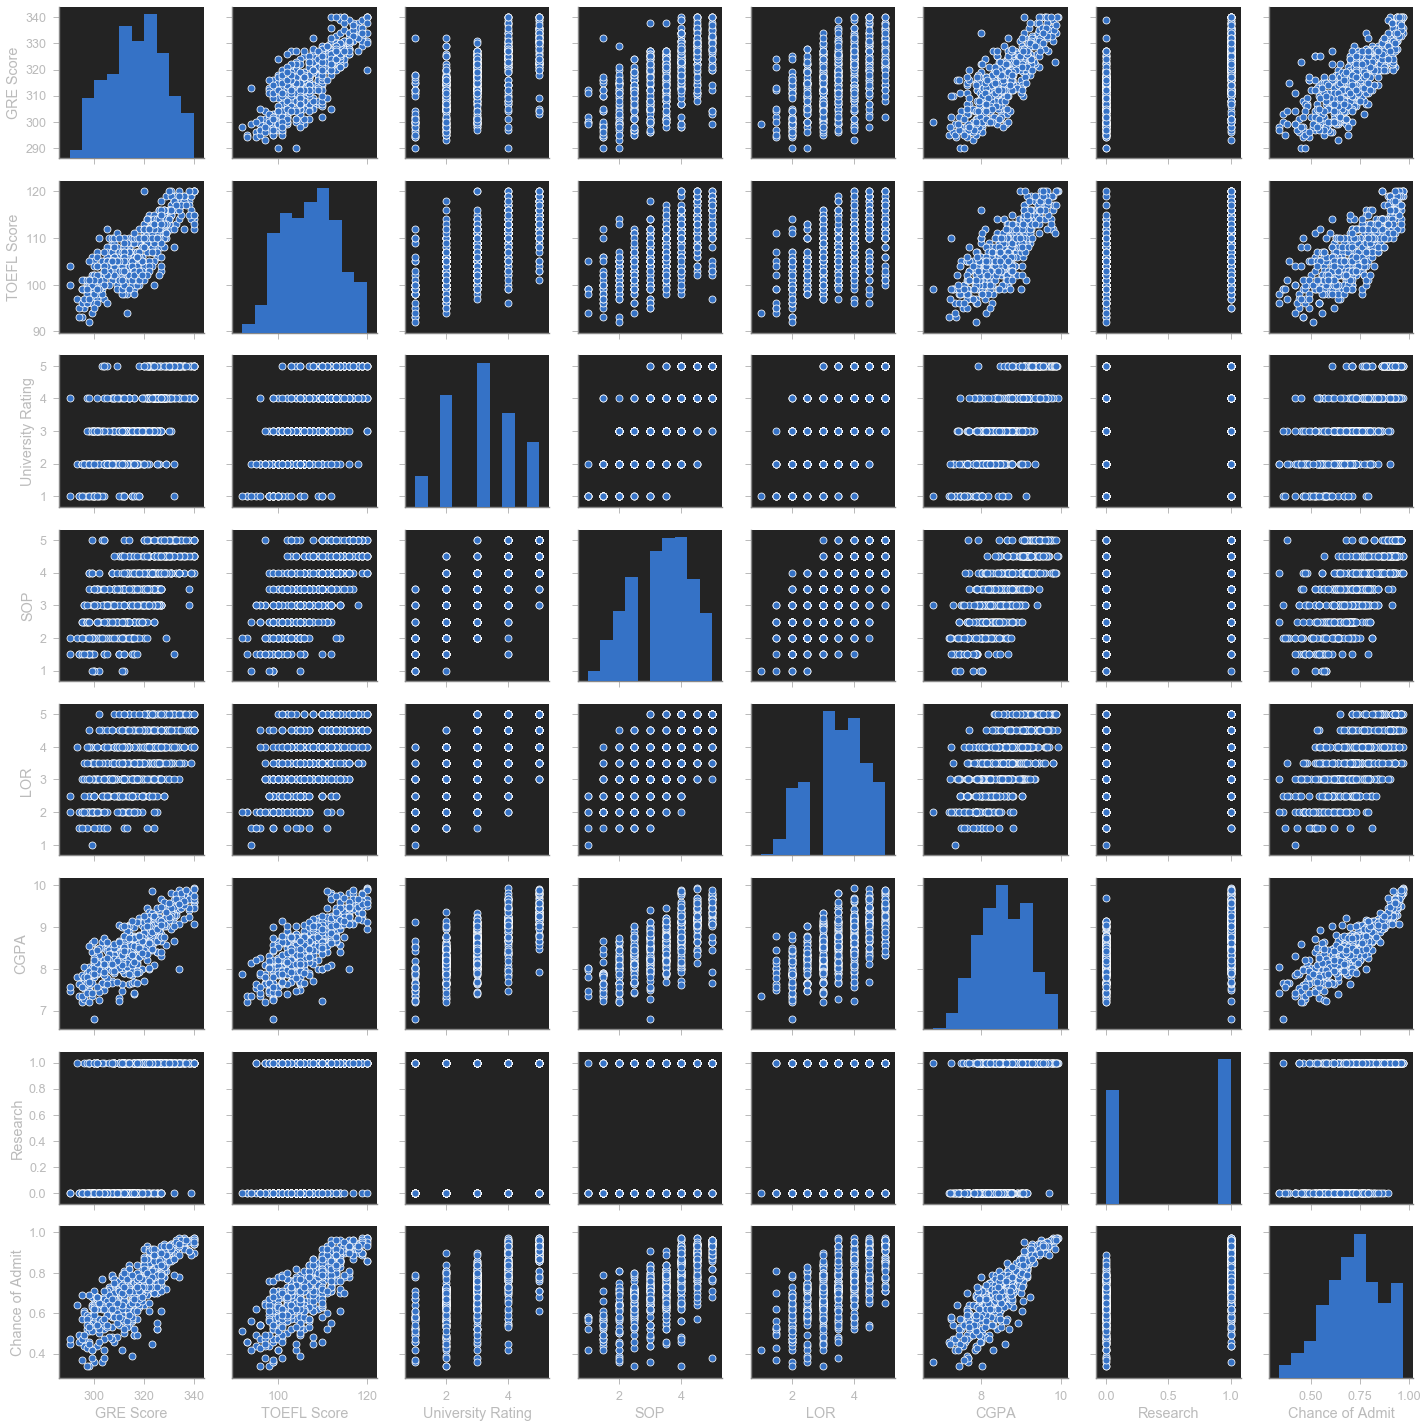

In [6]:
# view pairplot
sns.pairplot(admission_df)

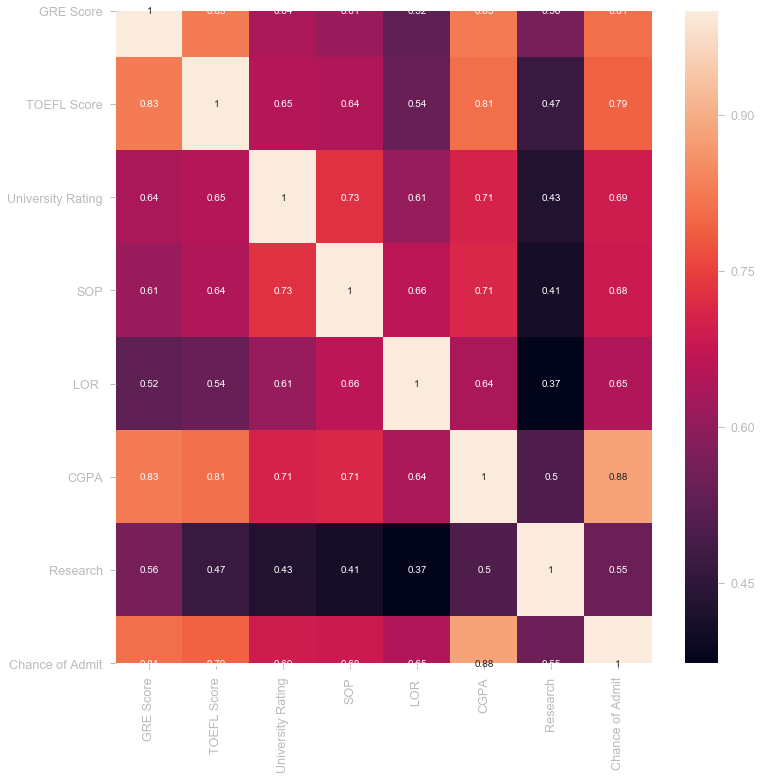

In [7]:
# plot correlations
corr_matrix = admission_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Create Training & Testing Datasets

In [8]:
X = admission_df.drop(columns = ['Chance of Admit'])

In [9]:
y = admission_df['Chance of Admit']

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
# reshape y
y = y.reshape(-1,1)
y.shape

(500, 1)

In [12]:
# scale data before training model
# remove bias by creating consistent range for each feature

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

# same for y
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [13]:
# spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [15]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8421191140683675

## Neural Network

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
# Dropout ensures we are not overfitting
# relu is rectified linear unit
# build network sequentially
# first, add layer to model that is dense (fully connected), has 50 neurons and 7 input dimensions

ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

# implement regression task
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [18]:
# compile and specify loss
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [19]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 12ms/step - loss: 0.6400 - val_loss: 0.2462
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2999 - val_loss: 0.2824
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3037 - val_loss: 0.2459
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2818 - val_loss: 0.2379
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2682 - val_loss: 0.2533
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2380 - val_loss: 0.2472
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2587 - val_loss: 0.2517
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2456 - val_loss: 0.2481
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2565 - val_loss: 0.2628
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2572 - val_loss: 0.2601
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.1657 - val_loss: 0.3055
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1431 - val_loss: 0.2749
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 0.2924
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1405 - val_loss: 0.3231
Epoch 87/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1707 - val_loss: 0.2653
Epoch 88/100
17/17 [==============================] - ETA: 0s - loss: 0.129 - 0s 3ms/step - loss: 0.1154 - val_loss: 0.2674
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1291 - val_loss: 0.2781
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1205 - val_loss: 0.3164
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1252 - val_loss: 0.3060
Epoch 92/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1201 - val_lo

In [20]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 1ms/step - loss: 0.1936
Accuracy : 0.8064108341932297


In [21]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

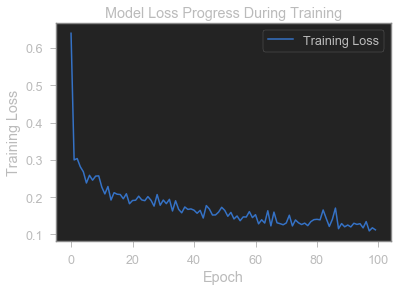

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## References

https://www.kaggle.com/mohansacharya/graduate-admissions

https://www.coursera.org/projects/machine-learning-university-admission